# Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [7]:
stk = pd.read_csv('nse.csv.txt')
stk.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:
stk.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [9]:
stk.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2030,False,False,False,False,False,False,False,False
2031,False,False,False,False,False,False,False,False
2032,False,False,False,False,False,False,False,False
2033,False,False,False,False,False,False,False,False


In [10]:
stk['Date']=pd.to_datetime(stk['Date'])
print(type(stk.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [11]:
df=stk.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [12]:
df.reset_index(inplace=True)

In [13]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


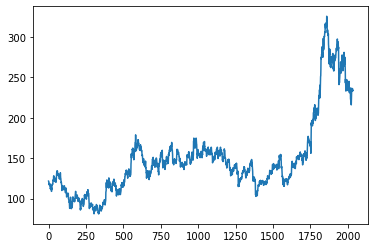

In [14]:
plt.plot(df['Close']) 

In [15]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

In [16]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [17]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

In [18]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
19/19 [==============================] - 8s 183ms/step - loss: 0.0113 - val_loss: 0.0014
Epoch 2/60
19/19 [==============================] - 2s 117ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 2s 121ms/step - loss: 9.9185e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 2s 120ms/step - loss: 8.6966e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 2s 122ms/step - loss: 8.5012e-04 - val_loss: 0.0013
Epoch 6/60
19/19 [==============================] - 2s 124ms/step - loss: 8.1393e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 2s 126ms/step - loss: 7.7960e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 2s 125ms/step - loss: 7.4915e-04 - val_loss: 9.6007e-04
Epoch 9/60
19/19 [==============================] - 2s 124ms/step - loss: 7.5397e-04 - val_loss: 9.1602e-04
Epoch 10/60
19/19 [==============================] - 3s 134ms/st

In [25]:
test_predict=model.predict(X_test)
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

16/16 [==============================] - 1s 22ms/step


array([[142.44125 ],
       [142.60193 ],
       [141.60106 ],
       [138.73544 ],
       [137.14827 ],
       [136.81435 ],
       [138.2283  ],
       [139.87166 ],
       [140.0853  ],
       [139.51254 ],
       [139.22507 ],
       [140.58977 ],
       [141.45811 ],
       [143.10211 ],
       [145.3717  ],
       [142.96169 ],
       [140.31198 ],
       [140.17638 ],
       [141.07674 ],
       [146.55031 ],
       [150.99234 ],
       [152.75069 ],
       [152.685   ],
       [150.33453 ],
       [150.36748 ],
       [150.39264 ],
       [150.94298 ],
       [152.74055 ],
       [153.33617 ],
       [153.12196 ],
       [153.45047 ],
       [152.1612  ],
       [148.70517 ],
       [142.77759 ],
       [139.59949 ],
       [138.99535 ],
       [139.29428 ],
       [138.27457 ],
       [135.61142 ],
       [131.65222 ],
       [129.20363 ],
       [128.25345 ],
       [126.20819 ],
       [125.46687 ],
       [123.38012 ],
       [120.66358 ],
       [120.078964],
       [119.9

In [26]:
import math
from sklearn.metrics import mean_squared_error
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.03851064491152271